Instructiuni:
    
    - downloadati o copie a acestui notebook 
    - downloadati fisierul WA_Fn-UseC_-Telco-Customer-Churn.csv
    - upload in jupyter cu notebook si fisier csv la acelasi nivel
        
 Importuri necesare

In [88]:
import pandas as pd
import numpy as np

Ca sa cititi schimbati calea `input_path` in calea dorita - daca csv-ul e langa notebook: `input_path = ''`

In [48]:
# citirea datelor
input_path = 'C:/work/UNITBV_DataMining/2019/ADS/ProjectDataSets/1. telco-customer-churn/'
#C:/temp/ProjectDataSets
files = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [49]:
df_telcochurn = pd.read_csv(input_path + files, header = 0)

 

In [61]:
df_telcochurn.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService         object
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# CORELATIE

1. Coeficientul de corelatie Pearson

2. Rank correlation

3. Matricea de corelatie pentru variabilele continue


# Covarianta

In [50]:
df_telcochurn.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
np.cov(df_telcochurn.tenure,df_telcochurn.MonthlyCharges)

array([[603.16810812, 183.19698749],
       [183.19698749, 905.41093434]])

# Corelatie (impartim la produsul deviatiilor standard; pe diagonala cat vom obtine ?)

In [52]:
from scipy.stats import pearsonr
corr,_  = pearsonr(df_telcochurn.tenure,df_telcochurn.MonthlyCharges)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.248


In [53]:
df_telcochurn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [54]:
from scipy.stats import spearmanr
spearmanr(df_telcochurn.PaymentMethod,df_telcochurn.InternetService)

SpearmanrResult(correlation=0.08468606267420184, pvalue=1.0902739248249366e-12)

In [56]:
df_telcochurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [57]:
# Matricea de corelatie - corelatie Pearson pentru numerice, ranked pt categoriale ordonate
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
other_cols = ['MonthlyCharges', 'TotalCharges']
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
X = df_telcochurn
# apply le on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)




,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
5,0,0,0,0,2,1,0,0,2,0,2,2,0,1,2
6,1,0,0,1,2,1,0,2,0,0,2,0,0,1,1
7,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3
8,0,0,1,0,2,1,0,0,2,2,2,2,0,1,2
9,1,0,0,1,0,0,2,2,0,0,0,0,1,0,0


In [58]:
X[categorical_cols].head(5)

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2


In [59]:
X[categorical_cols].corr(method = 'spearman')

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
gender,1.000000,-0.001874,-0.001808,0.010517,-0.006626,-0.001517,-0.014319,-0.011808,0.000768,-0.006263,-0.006387,-0.008726,0.001094,-0.011754,0.017119
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.145968,-0.016964,-0.141363,-0.020157,-0.028040,-0.163717,0.029752,0.046739,-0.143850,0.156530,-0.043703
Partner,-0.001808,0.016479,1.000000,0.452676,0.142041,0.000900,0.148804,0.152746,0.165893,0.125159,0.137336,0.129573,0.295925,-0.014877,-0.155247
Dependents,0.010517,-0.211185,0.452676,1.000000,-0.024949,0.034373,0.161477,0.095793,0.085442,0.142820,0.047664,0.021723,0.244120,-0.111377,-0.037590
MultipleLines,-0.006626,0.145968,0.142041,-0.024949,1.000000,-0.097689,-0.015199,0.106652,0.111745,-0.010075,0.172484,0.179330,0.107037,0.164786,-0.182721
InternetService,-0.001517,-0.016964,0.000900,0.034373,-0.097689,1.000000,0.020074,0.060925,0.070848,0.020815,0.119093,0.107663,0.079586,-0.117944,0.084686
OnlineSecurity,-0.014319,-0.141363,0.148804,0.161477,-0.015199,0.020074,1.000000,0.194121,0.185368,0.303877,0.045926,0.056147,0.392417,-0.181656,-0.080632
OnlineBackup,-0.011808,-0.020157,0.152746,0.095793,0.106652,0.060925,0.194121,1.000000,0.192148,0.204336,0.147611,0.136782,0.293445,-0.024861,-0.119225
DeviceProtection,0.000768,-0.028040,0.165893,0.085442,0.111745,0.070848,0.185368,0.192148,1.000000,0.248710,0.276711,0.288430,0.363058,-0.049900,-0.131120
TechSupport,-0.006263,-0.163717,0.125159,0.142820,-0.010075,0.020815,0.303877,0.204336,0.248710,1.000000,0.161038,0.160178,0.440338,-0.137417,-0.088904


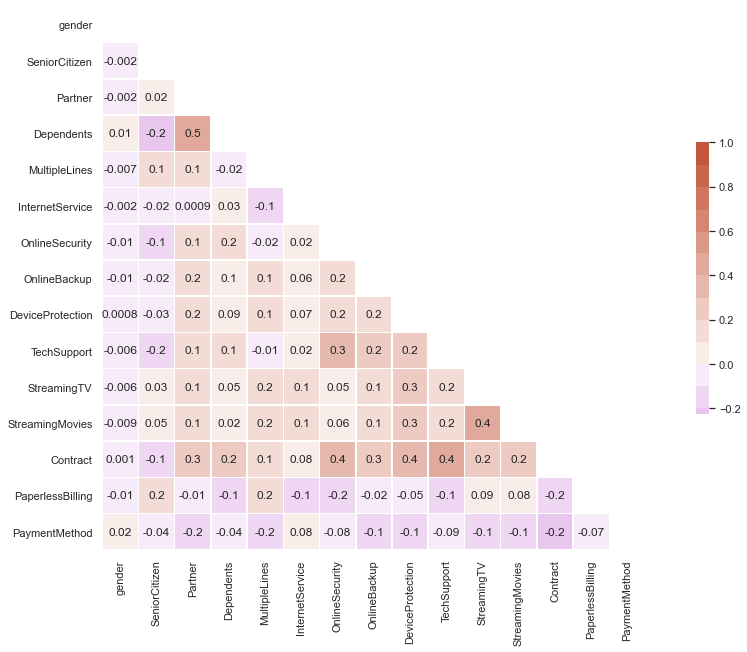

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

corr = X[categorical_cols].corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 20, n=20) #sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot = True,fmt='.0',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('test.jpg')
plt.show()

# PRINCIPAL COMPONENT ANALYSIS

Exemple de utilitate:
- reducerea dimensionalitatii
- variabile latente



In [15]:
def my_pca(input_df, pca_cols):
    
    # normalize using z-score normalization - this might be working with Standardscaler as well, using transform after fit - check
    sample_std_vec = np.std(input_df[pca_cols],axis = 0)
    sample_mean_vec = np.mean(input_df[pca_cols], axis=0)
    X_std = (input_df[pca_cols]-sample_mean_vec)/sample_std_vec
    
    # covariance matrix
    cov_mat = X_std.values.T.dot(X_std.values) / (X_std.shape[0]-1)
    
    if np.isnan(cov_mat).any():
        return None, None
    
    # eigenvalues & eigenvectors
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # explained variance
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    # build projection matrix onto components explaining at least 90% of variance in data
    n_dim = len(pca_cols)
    n_max = min([i for i in range(0,n_dim) if cum_var_exp[i] > 90])+1
    matrix_p = np.hstack( (eig_pairs[i][1].reshape(n_dim,1) for i in range(0,n_max)))
    
    principal_components = [ (eig_pairs[i], var_exp[i]) for i in range(0,n_dim)]
    adict = {}
    adict['feature'] = [pca_cols[i] for i in range(0, n_dim)]
    
    for i in range(0,n_dim):
        
        adict['pc'+str(i)] = eig_pairs[i][1]
            
    df_feature_pc_temp = pd.DataFrame(adict)
    df_feature_pc_temp['expl var'] = [ var_exp[i] for i in range(0, n_dim)]
    df_feature_pc = df_feature_pc_temp.T
    # project onto new feature space
    Y = X_std.values.dot(matrix_p)
    
    # error terms
    X_hat = Y.dot(matrix_p.T)
    Err = X_std.values-X_hat
    
    return {'Componente_principale':principal_components,
           'Matrice_Proiectie':matrix_p,
           'Legatura_cu_Datele_Initiale':df_feature_pc}

In [16]:
test = my_pca(X, categorical_cols)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [64]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,No,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,Yes,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,Yes,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,No,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,Yes,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,Yes,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.5,No
7039,2234-XADUH,0,0,1,1,72,Yes,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.9,No
7040,4801-JZAZL,0,0,1,1,11,No,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,No
7041,8361-LTMKD,1,1,1,0,4,Yes,2,1,0,...,0,0,0,0,0,1,3,74.40,306.6,Yes


In [18]:
test['Legatura_cu_Datele_Initiale'].T

,feature,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,expl var
0,gender,0.00854989,0.0214834,0.0111933,0.0843079,0.990412,-0.0636703,-0.0036094,0.0634584,0.025215,0.0435325,0.0116278,-0.0141597,-0.00405243,0.000348326,-0.0184326,18.8954
1,SeniorCitizen,0.0939794,-0.408351,-0.0784917,0.0231943,-0.00470443,-0.579254,-0.0875931,-0.491598,0.357618,0.0513872,-0.160523,0.0384637,0.0435593,0.207887,0.172996,11.5132
2,Partner,-0.305047,0.0345186,-0.399459,0.474975,-0.0380314,-0.0916326,-0.0405659,-0.174496,0.107536,-0.0265191,-0.0384054,0.00947763,-0.0405498,-0.519977,-0.439085,8.5206
3,Dependents,-0.243039,0.292041,-0.314138,0.517228,-0.0296622,0.149381,-0.0556091,0.007376,0.0297337,-0.0331947,-0.0219935,-0.0172868,0.00848826,0.608282,0.30041,7.76912
4,MultipleLines,-0.149413,-0.411139,-0.260647,-0.0312086,0.0270389,-0.094636,-0.0165768,-0.0289706,-0.785004,0.163041,0.00594852,0.257202,0.0118457,0.131849,-0.049005,6.66806
5,InternetService,-0.056492,0.103989,0.529222,0.393113,-0.0987343,-0.41539,0.112406,0.279072,-0.000674628,0.296272,0.194278,0.348067,-0.0177426,0.0818879,-0.157718,6.28818
6,OnlineSecurity,-0.290997,0.24483,-0.0855676,-0.329153,-0.00346454,-0.0952259,-0.131081,-0.225663,0.0305568,0.533183,0.467583,-0.331681,0.038016,0.134637,-0.170564,5.68441
7,OnlineBackup,-0.278026,-0.0402877,-0.0256127,-0.151307,-0.0320058,-0.355013,-0.615585,0.509707,0.0113608,-0.270885,-0.11964,-0.198651,-0.0310981,0.0422637,-0.0410751,5.53408
8,DeviceProtection,-0.343488,-0.118076,0.185676,-0.0826737,0.0507617,0.0395865,0.081286,-0.240355,0.0358336,-0.640922,0.529776,0.195062,0.0369804,0.126076,-0.10101,5.12011
9,TechSupport,-0.338723,0.151615,0.0725367,-0.326179,0.043916,0.205406,-0.0831208,-0.113398,0.199344,0.118645,-0.48418,0.52136,-0.0154429,0.193686,-0.298199,4.82249


## Agregari de date Partea I

In [63]:
# group by
df= df_telcochurn

Care este pretul lunar mediu pe atributul gender?


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int32
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int32
Dependents          7043 non-null int32
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null int32
InternetService     7043 non-null int32
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null int32
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null int32
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int32(14), int64(2), object

Dupa cum vedem, valorile din TotalCharges nu au putut fi convertite toate in float. Sa vedem ce alte valori sunt:

In [73]:
# tipul df['TotalCharges'] este object si ar trebui sa fie float
# incercam sa convertim eliminand spatii. marcam cu -1 insuccesul si ne uitam la valori

# functia cu care vom face marcajul
def convert_To_float(x):
    # incercam conversia directa
    try:
        return float(x)
    except:
        # nu am reusit. incercam conversia eliminand spatii la capete
        try:
            return float(trim(x))
        except:
            # nu am reusit - marcam cu -1 
            return -1
        
df['TotalCharges_string'] = df['TotalCharges'].apply(lambda x: convert_To_float(x))


Filtram valorile la cele cu marcaj -1 mai sus si vedem ca valorile problematice sunt spatii:

In [76]:
df[df['TotalCharges_string'] == -1]['TotalCharges'].values

array([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
      dtype=object)

Stergem din setul de date aceste valori lipsa precum si coloana temporara folosita:

In [79]:
df=df[df['TotalCharges_string'] != -1].drop(columns= ['TotalCharges_string'])


Convertim la float:

In [81]:
df['TotalCharges']=df['TotalCharges'].astype('float')

Grupam dupa colana `gender`, selectam coloanele pe care vrem agregari si calculam agregarile dorite.
> OBS: aici am folosit agregari uzuale. Se pot folosi si alte agregari mai complicate, atat functii utilizator la nivel de grup de inregistrari cat si functii dataframe.
> OBS: dincolo de agregari se pot si stampila valori agregate pe toate inregistrarile grupului folosind functia pandas `transform`
    


In [84]:
# pentru a crea un set de date agregat
df_agg = df.groupby(['gender'])[['MonthlyCharges','TotalCharges']].agg(['mean','min','max','std'])
df_agg

MonthlyCharges                           TotalCharges                  \
                 mean    min     max        std         mean    min      max   
gender                                                                         
0           65.216652  18.40  118.75  30.070508  2283.190985  18.85  8672.45   
1           64.387546  18.25  118.35  30.099725  2283.407861  18.80  8684.80   

                     
                std  
gender               
0       2270.830254  
1       2263.100874

Accesarea coloanelor unui dataframe agregat se face folosing multiindexul. Prima data sa vedem cum arata coloanele:

In [85]:
df_agg.columns

MultiIndex([('MonthlyCharges', 'mean'),
            ('MonthlyCharges',  'min'),
            ('MonthlyCharges',  'max'),
            ('MonthlyCharges',  'std'),
            (  'TotalCharges', 'mean'),
            (  'TotalCharges',  'min'),
            (  'TotalCharges',  'max'),
            (  'TotalCharges',  'std')],
           )

Astfel daca vrem sa accesam coloanele cu max pentru Total_Charges:

In [86]:
df_agg[('TotalCharges','max')].values

array([8672.45, 8684.8 ])

Daca dorim stampilarea inregistrarilor cu maximul pe `TotalCharges` grupat dupa `gender`:

In [87]:
df['TotalCharges_max'] = df.groupby('gender')['TotalCharges'].transform('max')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_max
0,7590-VHVEG,0,0,1,0,1,No,1,0,0,...,0,0,0,0,1,2,29.85,29.85,No,8672.45
1,5575-GNVDE,1,0,0,0,34,Yes,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,No,8684.80
2,3668-QPYBK,1,0,0,0,2,Yes,0,0,2,...,0,0,0,0,1,3,53.85,108.15,Yes,8684.80
3,7795-CFOCW,1,0,0,0,45,No,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,No,8684.80
4,9237-HQITU,0,0,0,0,2,Yes,0,1,0,...,0,0,0,0,1,2,70.70,151.65,Yes,8672.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,Yes,2,0,2,...,2,2,2,1,1,3,84.80,1990.50,No,8684.80
7039,2234-XADUH,0,0,1,1,72,Yes,2,1,0,...,0,2,2,1,1,1,103.20,7362.90,No,8672.45
7040,4801-JZAZL,0,0,1,1,11,No,1,0,2,...,0,0,0,0,1,2,29.60,346.45,No,8672.45
7041,8361-LTMKD,1,1,1,0,4,Yes,2,1,0,...,0,0,0,0,1,3,74.40,306.60,Yes,8684.80
